In [1]:
import pickle
import numpy as np

import tensorflow as tf
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt
from data_processing import *

def show_images(left_image, center_image, right_image): 
                
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
 
    axis = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])
    axis.imshow(left_image)
    
    axis = fig.add_subplot(1, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(left_image, 1)
    axis.imshow(img)
    
    axis = fig.add_subplot(1, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(left_image, 1, 100)
    axis.imshow(img)
    
    axis = fig.add_subplot(1, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(left_image)
    axis.imshow(img)
    
    axis = fig.add_subplot(1, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(left_image)
    axis.imshow(img)
    
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    axis = fig.add_subplot(2, 5, 1, xticks=[], yticks=[])
    axis.imshow(center_image)
    
    axis = fig.add_subplot(2, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(center_image, 1)
    axis.imshow(img)
    
    axis = fig.add_subplot(2, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(center_image, 1, 100)
    axis.imshow(img)
    
    axis = fig.add_subplot(2, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(center_image)
    axis.imshow(img)
    
    axis = fig.add_subplot(2, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(center_image)
    axis.imshow(img)
    
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    axis = fig.add_subplot(3, 5, 1, xticks=[], yticks=[])
    axis.imshow(right_image)
    
    axis = fig.add_subplot(3, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(right_image, 1)
    axis.imshow(img)
    
    axis = fig.add_subplot(3, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(right_image, 1, 100)
    axis.imshow(img)
    
    axis = fig.add_subplot(3, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(right_image)
    axis.imshow(img)
    
    axis = fig.add_subplot(3, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(right_image)
    axis.imshow(img)
    
    plt.show()
    

Track 1 images left, center and right (pre and post cropping)


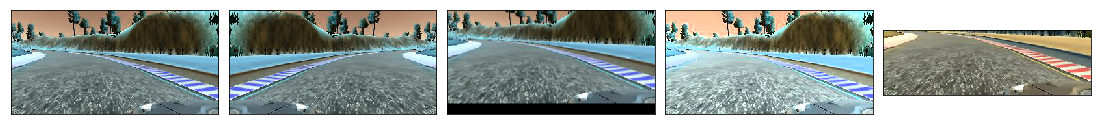

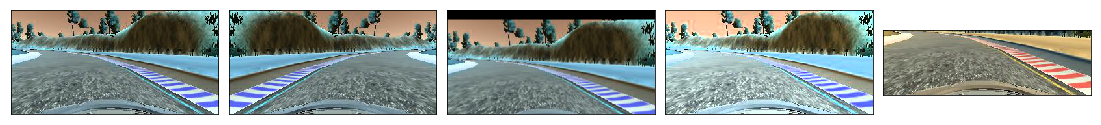

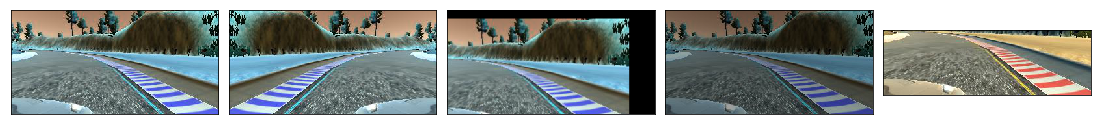

In [3]:
# CSV format center_image_path, left_image_path, right_image_path, steering, throttle, brake, speed
import csv


track_one_csv_file = "./data/track1/driving_log.csv"
track_two_csv_file = "./data/track2/driving_log.csv"

data = []

show_track1_images = True
show_track2_images = True

with open(track_one_csv_file) as csvfile:
    track_one_csv = csv.reader(csvfile, delimiter=',')
    
    print ("Track 1 images left, center and right (pre and post cropping)")
    for row in track_one_csv:
        left_path = "./data/track1/IMG/" + row[1].split("/")[-1]
        center_path = "./data/track1/IMG/" + row[0].split("/")[-1]
        right_path = "./data/track1/IMG/" + row[2].split("/")[-1]

        steering_angle = float(row[3])
        
        data.append((left_path, center_path, right_path, steering_angle))
        
        left_image = cv2.imread(left_path)
        
        center_image = cv2.imread(center_path)
        
        right_image = cv2.imread(right_path)

        if show_track1_images:
            show_images(left_image, center_image, right_image)
            show_track1_images = False

Track 2 images left, center and right (pre and post cropping)


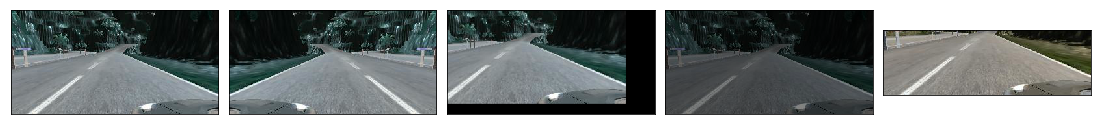

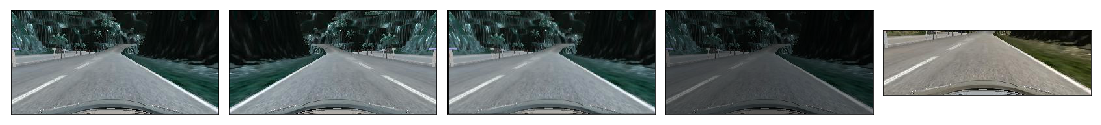

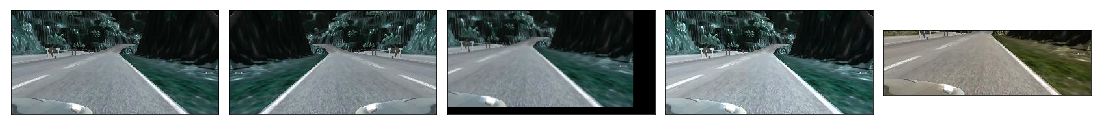

In [4]:
with open(track_two_csv_file) as csvfile:
    track_one_csv = csv.reader(csvfile, delimiter=',')
    
    print ("Track 2 images left, center and right (pre and post cropping)")
    for row in track_one_csv:
        left_path = "./data/track2/IMG/" + row[1].split("/")[-1]
        center_path = "./data/track2/IMG/" + row[0].split("/")[-1]
        right_path = "./data/track2/IMG/" + row[2].split("/")[-1]
        
        steering_angle = float(row[3])
        
        data.append((left_path, center_path, right_path, steering_angle))
        
        left_image = cv2.imread(left_path)

        center_image = cv2.imread(center_path)

        right_image = cv2.imread(right_path)   
      
        if show_track2_images:
            show_images(left_image, center_image, right_image)
            show_track2_images = False

In [ ]:
from generator import behaviour_cloning_generator

from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(data, test_size=0.2)

BATCH_SIZE = 128
EPOCHS = 20

# compile and train the model using the generator function
train_generator = behaviour_cloning_generator(train_data, batch_size=BATCH_SIZE)
validation_generator = behaviour_cloning_generator(validation_data, batch_size=BATCH_SIZE)

In [ ]:
from models import Models

model = Models(input_shape=(100, 320, 3)).model

model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history_object = model.fit_generator(train_generator, steps_per_epoch =
                                    len(train_data), validation_data = 
                                    validation_generator,
                                    validation_steps = len(validation_data), 
                                    epochs=EPOCHS, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


model.save("model.h5")


Epoch 1/20
  70/8162 [..............................] - ETA: 48063s - loss: 2.7737 - acc: 0.0204 